In [75]:
import pandas as pd
import plotly.express as px
import seaborn as sns


In [2]:
sealice = pd.read_csv('../../../ignore_git/Rejectants_ignore/Ecosse/20240322_se_sealice_residues.csv')
sealice.head()

,Residues ID,SEPA Site,Submitted By,Licence Active at Report,Treatment Name,Active Ingredient,End of Treatment Date,Sample Date,Days Between,Cage Replicate 1 ug per kg,...,150 m Replicate 1 ug per kg,150 m Replicate 2 ug per kg,150 m Replicate 3 ug per kg,Site Name,Licence Holder,Receiving Water,Easting,Northing,Local Authority,National Grid Reference
0,7084,CLP1,Loch Duart Ltd,CAR/L/1002994,Slice,Emamectin Benzoate,03-Aug-2023,18-Dec-2023,NaN,0.1,...,NaN,NaN,NaN,Caolas Loch Portain,Loch Duart Ltd,Loch Maddy,94830,869330,Eilean Siar,NF 9483 6933
1,7083,REI2,Loch Duart Ltd,CAR/L/1002919,Slice,Emamectin Benzoate,28-Jul-2023,05-Dec-2023,NaN,0.05,...,NaN,NaN,NaN,Reintraid,Loch Duart Ltd,Loch a Chairn Bhain,219092,934058,Highland,NC 1911 3406
2,7089,MAN2,Scottish Sea Farms Ltd,CAR/L/1003943,Slice,Emamectin Benzoate,09-Jul-2023,20-Nov-2023,NaN,NaN,...,NaN,NaN,NaN,"South Sound, Mangaster Voe",Scottish Sea Farms Ltd,Mangaster Voe,432260,1169880,Shetland Islands,HU 3226 6988
3,7086,POR2,Bakkafrost Scotland Ltd,CAR/L/1002350,Slice,Emamectin Benzoate,28-Jun-2023,16-Nov-2023,NaN,NaN,...,NaN,NaN,NaN,Loch Portree (Torvaig),Bakkafrost Scotland Ltd,Sound of Raasay,150600,844120,Highland,NG 5060 4412
4,7087,POR3,Bakkafrost Scotland Ltd,CAR/L/1148485,Slice,Emamectin Benzoate,27-Jun-2023,16-Nov-2023,NaN,NaN,...,NaN,NaN,NaN,Portree Outer,Bakkafrost Scotland Ltd,Sound of Raasay,151083,844572,Highland,NG 5108 4457


In [72]:
env_surv = pd.read_csv('../../../ignore_git/Rejectants_ignore/Ecosse/20240322_Aquautlture_senvironmental_monitoring_surveys.csv')

# keep only Salmon
env_surv = env_surv.loc[env_surv.Salmon == 'T', :]
env_surv = env_surv.reset_index(drop=True)

'''
env_surv.shape (3250, 25)

env_surv.columns
['Survey Number', 'SEPA Site', 'Survey Date', 'Monitoring Method',
       'SEPA Classification', 'Submitted By', 'Licence Active at Survey',
       'Maximum Biomass Allowed (tonnes)', 'Actual Biomass on Site (tonnes)',
       'Survey Type', 'Site Name', 'Operator', 'Receiving Water', 'Easting',
       'Northing', 'Water Type', 'Local Authority', 'National Grid Reference',
       'SEPA Team', 'Salmon', 'Cod', 'Halibut', 'Haddock', 'Trout',
       'Other Species']
'''
# Créer une colonne for species salmon only or not
env_surv['Species_code'] = env_surv.Salmon
env_surv['Only Salmon'] = ['False' for ligne in range(len(env_surv))]

for ligne in range(0, len(env_surv), 1):
   
    env_surv.loc[ligne, 'Species_code'] = env_surv.loc[ligne, 'Salmon'] + env_surv.loc[ligne, 'Cod'] + \
                env_surv.loc[ligne, 'Halibut'] + env_surv.loc[ligne, 'Haddock'] + \
                env_surv.loc[ligne, 'Trout'] + env_surv.loc[ligne, 'Other Species']

    if env_surv.loc[ligne, 'Species_code'] == 'TFFFFF':
        env_surv.loc[ligne, 'Only Salmon'] = 'True'

''' 
Only Salmon
True     2416
False     834
'''
# Aquaclture en surproduction
env_surv['Too_much_biomasse'] = ['False' for ligne in range(len(env_surv))]
env_surv['Too_much_biomasse_percent'] = ['0' for ligne in range(len(env_surv))]

for ligne in range(0, len(env_surv), 1):
    env_surv.loc[ligne, 'Too_much_biomasse_percent'] = round(env_surv.loc[ligne, 'Actual Biomass on Site (tonnes)']/ env_surv.loc[ligne, 'Maximum Biomass Allowed (tonnes)'] *100, 1)
    if env_surv.loc[ligne, 'Actual Biomass on Site (tonnes)'] > env_surv.loc[ligne, 'Maximum Biomass Allowed (tonnes)']:
        env_surv.loc[ligne, 'Too_much_biomasse'] = 'True'

env_surv['Too_much_biomasse'].value_counts()
''' 
Too_much_biomasse
False    3179
True       71
'''

display(sns.boxplot(env_surv['Too_much_biomasse_percent']).set(title = '2%  of Scottish aquculture are overporducing'))

env_surv.head()


,Survey Number,SEPA Site,Survey Date,Monitoring Method,SEPA Classification,Submitted By,Licence Active at Survey,Maximum Biomass Allowed (tonnes),Actual Biomass on Site (tonnes),Survey Type,...,Salmon,Cod,Halibut,Haddock,Trout,Other Species,Species_code,Only Salmon,Too_much_biomasse,Too_much_biomasse_percent
0,24294,SCQN1,05-Jun-2024,Benthic fauna,To be evaluated,Mowi Scotland Ltd,CAR/L/1157209,2500.0,2125.0,Self Monitoring,...,T,F,F,F,F,F,TFFFFF,True,False,85.0
1,24293,NEPL1,21-Jan-2024,Benthic fauna,To be evaluated,Scottish Sea Farms Ltd,CAR/L/1108670,1750.0,803.0,Self Monitoring,...,T,F,F,F,F,F,TFFFFF,True,False,45.89
2,24292,FFMC32,21-Nov-2023,Benthic fauna,To be evaluated,Dawnfresh Farming Ltd,CAR/L/1003268,250.0,182.0,Self Monitoring,...,T,F,F,F,T,F,TFFFTF,False,False,72.8
3,24291,HAS1,16-Nov-2023,Benthic fauna and visual,To be evaluated,Cooke Aquaculture Scotland,CAR/L/1003874,1784.0,0.0,Self Monitoring,...,T,T,T,T,T,F,TTTTTF,False,False,0.0
4,24290,FLAE1,18-Oct-2023,Benthic fauna and visual,To be evaluated,Cooke Aquaculture Scotland,CAR/L/1016129,2446.0,119.0,Self Monitoring,...,T,T,T,T,T,F,TTTTTF,False,False,4.87


In [4]:
temp = pd.read_csv('../../../ignore_git/Rejectants_ignore/Ecosse/20240322details_sites_ms_site_details.csv')

temp.Species.unique()

liste_temp_to_keep = ['Atlantic Salmon', 'Atlantic Salmon, N/A, Rainbow Trout', 'Wrasse, Atlantic Salmon, Lumpsucker, N/A',
                    'Atlantic Salmon, N/A', 'N/A, Atlantic Salmon', 'N/A, Lumpsucker, Atlantic Salmon, Wrasse', 
                    'N/A, Wrasse, Atlantic Salmon', 'N/A, Lumpsucker, Atlantic Salmon, Wrasse', 'N/A, Wrasse, Atlantic Salmon', 
                    'N/A, Atlantic Salmon, Lumpsucker, Wrasse', 'Lumpsucker, Wrasse, N/A, Atlantic Salmon', 
                    'Lumpsucker, N/A, Wrasse, Atlantic Salmon', 'Wrasse, Lumpsucker, Atlantic Salmon, N/A', 
                    'Lumpsucker, Wrasse, Atlantic Salmon, N/A', 'Atlantic Salmon, N/A, Wrasse, Lumpsucker', 
                    'Wrasse, Atlantic Salmon, N/A, Lumpsucker', 'Atlantic Salmon, Wrasse, N/A, Lumpsucker', 
                    'Brown Trout and sea trout, N/A, Atlantic Salmon', 'Lumpsucker, Atlantic Salmon, Wrasse, N/A', 
                    'N/A, Lumpsucker, Atlantic Salmon', 'Atlantic Salmon, Lumpsucker, N/A', 'Lumpsucker, Atlantic Salmon, N/A', 
                    'Atlantic Salmon, N/A, Lumpsucker', 'Atlantic Salmon, Wrasse, Lumpsucker, N/A', 'Atlantic Salmon, Lumpsucker, Wrasse, N/A', 
                    'Wrasse, N/A, Lumpsucker, Atlantic Salmon', 'Lumpsucker, Atlantic Salmon, N/A, Wrasse', 
                    'European Perch, N/A, Atlantic Salmon, Rainbow Trout, Brown Trout and sea trout', 
                    'Lumpsucker, N/A, Atlantic Salmon, Wrasse', 'Atlantic Salmon, N/A, Brown Trout and sea trout', 
                    'N/A, Atlantic Salmon, Brown Trout and sea trout', 'Atlantic Salmon, N/A, Lumpsucker, Wrasse', 
                    'N/A, Atlantic Salmon, Lumpsucker', 'Brown Trout and sea trout, Atlantic Salmon, N/A', 'Halibut, N/A', 
                    'Wrasse, Atlantic Salmon, Halibut, N/A, Lumpsucker', 'Atlantic Salmon, Lumpsucker, N/A, Wrasse', 
                    'N/A, European Smelt (Sparling), Atlantic Salmon, Brown Trout and sea trout', 
                    'Atlantic Salmon, Brown Trout and sea trout, N/A', 'N/A, Lumpsucker, Wrasse, Atlantic Salmon', 
                    'Wrasse, N/A, Atlantic Salmon, Lumpsucker', 'N/A, Wrasse, Lumpsucker, Atlantic Salmon', 
                    'Wrasse, Atlantic Salmon, N/A', 'Rainbow Trout, Atlantic Salmon, N/A', 'N/A, Wrasse, Atlantic Salmon, Lumpsucker',
                    'Wrasse, Lumpsucker, N/A, Atlantic Salmon', 'N/A, Brown Trout and sea trout, Atlantic Salmon', 'N/A, Atlantic Salmon, Wrasse, Lumpsucker', 
                    'N/A, Atlantic Salmon, Wrasse', 'Atlantic Salmon, N/A, Brown Trout and sea trout, Rainbow Trout', 
                    'Brown Trout and sea trout, Atlantic Salmon, Rainbow Trout, N/A', 
                    'Rainbow Trout, Zebrafish, N/A, Atlantic Salmon, Whiteleg shrimp, European Perch, Brown Trout and sea trout', 
                    'Lumpsucker, N/A, Atlantic Salmon', 'Atlantic Salmon, Wrasse, Rainbow Trout, N/A, Tilapia']

temp.head()

,Marine Scotland Site ID,Date Registered,Site Name,National Grid Reference,Local Authority,Producing in Last 3 Years,Site Address 1,Site Address 2,Site Address 3,Site Post Code,Site Contact Number,Aquaculture Type,Water Type,Health Surveillance,Easting,Northing,MS Management Area,Region,Operator,Species
0,FS1347,18-Nov-2020,AGRF (Hatchery - RAS A),NT252642,Midlothian,No,The Roslin Institute,Easter Bush Campus,NaN,EH25 9RG,NaN,Fish,Freshwater,Low,325200,664200,NaN,Lothian,The Roslin Institute,"Atlantic Salmon, Rainbow Trout, N/A"
1,FS1353,02-Jul-2021,AGRF (RAS B),NT252642,Midlothian,No,The Roslin Institute,Easter Bush Campus,NaN,EH25 9RG,NaN,Fish,Freshwater,Low,325200,664200,Not in a management area,Lothian,The Roslin Institute,"Atlantic Salmon, N/A, Rainbow Trout"
2,FS0258,14-May-1979,Abbey St Bathans Trout Farm,NT760620,Scottish Borders,Yes,Duns,Berwickshire,NaN,TD11 3TX,NaN,Fish,Freshwater,Low,376000,662000,Not in a management area,Borders,Abbey St Bathans Trout Farm,"N/A, Rainbow Trout"
3,SS0570,01-Aug-1998,Acairseid Mhor,NM519550,Argyll and Bute,Yes,Calve Island,Sound of Mull,Argyll,PA75 6NU,NaN,Shellfish,Seawater,Low,151900,755000,"15b - Linnhe, Firth of Lorne, Sound of Mull an...",Strathclyde,R.B. & S.L. Barlow,"King scallop, N/A"
4,SS0575,26-May-1999,Achnacloich (Site 1),NM964341,Argyll and Bute,No,Achnacloich,Connel by Oban,Argyll,PA37 1PR,NaN,Shellfish,Seawater,Low,196400,734100,"15b - Linnhe, Firth of Lorne, Sound of Mull an...",Strathclyde,Muckairn Mussels,"Flat or native oyster, N/A, Pacific Oyster, Co..."


In [20]:
! ls ../../../ignore_git/Rejectants_ignore/Ecosse
'''
20240322_Aquautlture_senvironmental_monitoring_surveys.csv
20240322_Biomass_treatment_se_monthly_reports.csv
20240322details_sites_ms_site_details.csv
'20240322_Pollutant release_aquaculture_SPRI Application - SPRI data.csv'
 20240322_se_annual_emissions.csv
 20240322_se_sealice_residues.csv
 'Scottish Fish Farm Production Survey T24 - Atlantic salmon - Annual production of Atlantic salmon 1979-_0data.csv'

 scottish-pollutant-release-inventory-2022-full-data.xlsx
  2022-pollutant-emissions-and-waste-transfers-from-sepa-regulated-industrial-sites-datasheet.xlsx

'Scottish Fish Farm Production Survey - Table 24 - Annual production of Atlantic salmon 1979-2022 - Scottish Fish Farm Production_metadata.pdf'
  2022-pollutant-emissions-and-waste-transfers-from-sepa-regulated-industrial-sites.pdf
 'Scottish Fish Farm Production Survey 2022 - gov.scot.pdf'
'SPRI Scottish Environment Protection Agency (SEPA).pdf'
'''

 2022-pollutant-emissions-and-waste-transfers-from-sepa-regulated-industrial-sites-datasheet.xlsx
 2022-pollutant-emissions-and-waste-transfers-from-sepa-regulated-industrial-sites.pdf
 20240322_Aquautlture_senvironmental_monitoring_surveys.csv
 20240322_Biomass_treatment_se_monthly_reports.csv
 20240322details_sites_ms_site_details.csv
'20240322_Pollutant release_aquaculture_SPRI Application - SPRI data.csv'
 20240322_se_annual_emissions.csv
 20240322_se_sealice_residues.csv
'Scottish Fish Farm Production Survey 2022 - gov.scot.pdf'
'Scottish Fish Farm Production Survey T24 - Atlantic salmon - Annual production of Atlantic salmon 1979-_0data.csv'
'Scottish Fish Farm Production Survey - Table 24 - Annual production of Atlantic salmon 1979-2022 - Scottish Fish Farm Production_metadata.pdf'
 scottish-pollutant-release-inventory-2022-full-data.xlsx
'SPRI Scottish Environment Protection Agency (SEPA).pdf'


"\n 2022-pollutant-emissions-and-waste-transfers-from-sepa-regulated-industrial-sites-datasheet.xlsx\n 2022-pollutant-emissions-and-waste-transfers-from-sepa-regulated-industrial-sites.pdf\n 20240322_Aquautlture_senvironmental_monitoring_surveys.csv\n 20240322_Biomass_treatment_se_monthly_reports.csv\n 20240322details_sites_ms_site_details.csv\n'20240322_Pollutant release_aquaculture_SPRI Application - SPRI data.csv'\n 20240322_se_annual_emissions.csv\n 20240322_se_sealice_residues.csv\n scottish-pollutant-release-inventory-2022-full-data.xlsx\n'SPRI Scottish Environment Protection Agency (SEPA).pdf'\n"

In [14]:
'''
env_surv.columns

['Survey Number', 'SEPA Site', 'Survey Date', 'Monitoring Method',
       'SEPA Classification', 'Submitted By', 'Licence Active at Survey',
       'Maximum Biomass Allowed (tonnes)', 'Actual Biomass on Site (tonnes)',
       'Survey Type', 'Site Name', 'Operator', 'Receiving Water', 'Easting',
       'Northing', 'Water Type', 'Local Authority', 'National Grid Reference',
       'SEPA Team', 'Salmon', 'Cod', 'Halibut', 'Haddock', 'Trout',
       'Other Species']
'''
env_surv.shape


(3250, 25)

[Text(0.5, 1.0, '2%  overporduction')]

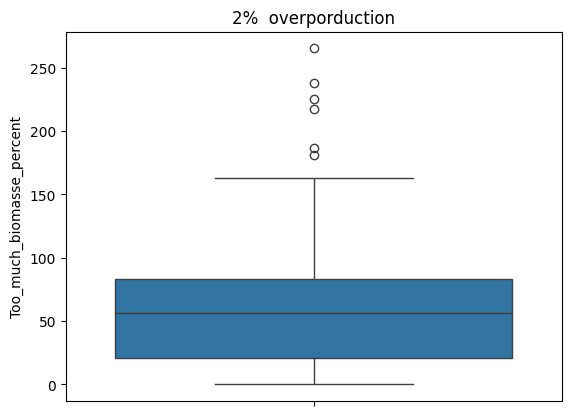

In [85]:
sns.boxplot(env_surv['Too_much_biomasse_percent']).set(title = '2%  overporduction')